In [1]:
import json
import random

random.seed(42)
# 读取原始JSON文件
data = []

with open('../data/angular_filtered/subsets/generation/test_race.json', 'r', encoding='utf-8') as f:
    race_data = json.load(f)
# with open('../data/angular_filtered/subsets/generation/test_gpt35_zeroshot.json', 'r', encoding='utf-8') as f:
#     zeroshot_data = json.load(f)
# with open('../data/angular_filtered/subsets/generation/test_gpt35_rag.json', 'r', encoding='utf-8') as f:
#     rag_data = json.load(f)
with open('../data/angular_filtered/subsets/generation/test_gpt35_model_classified_rag.json', 'r', encoding='utf-8') as f:
    model_rag_data = json.load(f)
# with open('../data/angular_filtered/subsets/generation/test_nngen.json', 'r', encoding='utf-8') as f:
#     nngen_data = json.load(f)
    

In [2]:
for index in range(len(model_rag_data)):
    item = {
        'diff': race_data[index]['diff'],
        # 'human': race_data[index]['msg'],
        'race': race_data[index]['race'],
        # 'zeroshot': zeroshot_data[index]['chatgpt_zeroshot'],
        # 'rag': rag_data[index]['chatgpt_rag'],
        'classified_rag': model_rag_data[index]['chatgpt_rag'],
        # 'nngen': nngen_data[index]['nngen'],
        'type': race_data[index]['type']
    }
    data.append(item)

with open('../data/angular_filtered/subsets/generation/test_all.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

In [3]:

# 确保JSON数据是一个列表
if not isinstance(data, list):
    raise ValueError("JSON数据不是一个列表")

# 随机选择100个项目
sample_size = 50
if len(data) < sample_size:
    raise ValueError("数据量少于50个项目")

initial_sample = random.sample(data, sample_size)

# 从剩余的项目中再随机选择100个项目
remaining_data = [item for item in data if item not in initial_sample]
# second_sample = random.sample(remaining_data, sample_size)

# 将选定的项目写入一个新的JSON文件
with open('../data/angular_filtered/subsets/human_eval/no_human_ref_test.json', 'w', encoding='utf-8') as f:
    json.dump(initial_sample, f, ensure_ascii=False, indent=4)
    
# 将选定的项目写入一个新的JSON文件
# with open('../data/angular_filtered/subsets/human_eval/human_ref_test.json', 'w', encoding='utf-8') as f:
#     json.dump(second_sample, f, ensure_ascii=False, indent=4)

print("随机提取的50个项目已保存到output.json文件中。")


随机提取的50个项目已保存到output.json文件中。


In [4]:
## 统计随机提取的50个项目的类型分布
types = {}
for item in initial_sample:
    if item['type'] not in types:
        types[item['type']] = 0
    types[item['type']] += 1

print("类型分布：")
for key, value in types.items():
    print(f"{key}: {value}")

类型分布：
refactor: 8
docs: 10
ci: 4
test: 5
feat: 9
chore: 5
fix: 7
style: 1
build: 1


In [5]:
import json
import random

# 读取原始数据文件
with open('../data/angular_filtered/subsets/human_eval/no_human_ref_test.json', 'r', encoding='UTF-8') as file:
    data = json.load(file)

mapping = {}

# 遍历每个对象并替换字段名称
for i, item in enumerate(data):
    item_id = f"Object-{i+1}"
    mapping[item_id] = {}
    
    keys = list(item.keys())
    keys_to_rename = [key for key in keys if key not in ['diff', 'type']]
    
    random.shuffle(keys_to_rename)
    
    # 创建一个新的字典来保存重命名后的字段
    new_item = {"diff": item["diff"]}
    
    for idx, key in enumerate(keys_to_rename, 1):
        new_key = str(idx)
        mapping[item_id][new_key] = key
        new_item[new_key] = item[key]
    
    # 替换原有的item
    data[i] = new_item

# 将修改后的数据写入新的JSON文件
with open('../data/angular_filtered/subsets/human_eval/no_human_ref_test_shuffled.json', 'w', encoding='UTF-8') as file:
    json.dump(data, file, ensure_ascii=False, indent=4)

# 将映射关系写入映射文件
with open('../data/angular_filtered/subsets/human_eval/no_human_ref_test_mapping.json', 'w', encoding='UTF-8') as file:
    json.dump(mapping, file, ensure_ascii=False, indent=4)



In [3]:
import json

# 读取output.json文件
with open('../data/angular_filtered/subsets/human_eval/no_human_ref_test_shuffled.json', 'r') as file:
    data = json.load(file)

# 打开markdown文件用于写入
with open('../data/angular_filtered/subsets/human_eval/no_human_ref_test_shuffled.md', 'w') as md_file:
    for i, item in enumerate(data, 1):
        md_file.write(f"## Item {i}\n\n")
        
        if 'diff' in item:
            md_file.write("```diff\n")
            md_file.write(f"{item['diff']}\n")
            md_file.write("```\n\n")
        
        for key, value in item.items():
            if key != 'diff':
                md_file.write(f"{key}: {value}\n\n")
        
        md_file.write("best description number: \n\n")
        md_file.write("---\n\n")

print("处理完成，生成了output.md文件。")


处理完成，生成了output.md文件。


In [1]:
import json

# Read the JSON file
with open('../data/angular_filtered/subsets/human_eval/no_human_ref_test_shuffled.json', 'r', encoding='UTF-8') as file:
    data = json.load(file)

# Define evaluation criteria
evaluation_criteria = """
Instruction: Your task is to evaluate the commit messages based on the commit code diffs, so first look at the code diffs and determine what the code changes are, and you will be given 2 commit messages generated by different models for each commit. **You need to score each commit message from the following criteria from the perspectives of Expressiveness, and Informativeness, with a minimum score of 0 and a maximum score of 4. Finally, compare the two commit messages given for each commit and select the Best description number (1 or 2).**

Evaluation Criteria:
| Expressiveness | Description                              |
| -------------- | ---------------------------------------- |
| 0              | Cannot read and understand.              |
| 1              | The content is difficult to read and understand.          |
| 2              | The content is somewhat readable and understandable. |
| 3              | The content is mostly readable and understandable.   |
| 4              | The content is very easy to read and understand.          |

| Informativeness | Description                                                  |
| --------------- | ------------------------------------------------------------ |
| 0               | No information about the code change is provided.             |
| 1               | Some crucial information is missing, making it hard to understand the code changes. |
| 2               | Some information is missing, but the missing parts are not essential for understanding the code changes. |
| 3               | There is some missing information, but none of it is necessary to understand the code changes. |
| 4               | All necessary information about the code change is included.                                 |
"""
with open('../data/angular_filtered/subsets/human_eval/no_human_ref_test_shuffled.md', 'w', encoding='UTF-8') as md_file:
    # Print evaluation criteria once at the beginning
    md_file.write(evaluation_criteria)
    
    # Parse each item and format the output into markdown
    for i, item in enumerate(data, 1):
        md_file.write(f"## Item {i}\n\n")
        diff = item['diff']
        md_file.write("````diff\n")
        md_file.write(diff)
        md_file.write("````\n\n")
    
        for key, value in item.items():
            if key != 'diff':
                value = value.replace('\n', ', ')
                value = value.replace('\r', ', ')
                md_file.write(f"{key}: '{value}'\n\n")
                # md_file.write("Conciseness: \n")
                md_file.write("Expressiveness: \n")
                md_file.write("Informativeness: \n\n")
        
        md_file.write("**Best description number:** \n\n")
        md_file.write("---\n\n")


In [2]:
def generate_file(filename, num_items=50):
    with open(filename, 'w') as file:
        for i in range(1, num_items + 1):
            file.write(f"item{i}-message1:\n")
            file.write("Expressiveness:\n")
            file.write("Informativeness:\n\n")
            file.write(f"item{i}-message2:\n")
            file.write("Expressiveness:\n")
            file.write("Informativeness:\n\n")
            file.write("Best description number:\n\n")
            file.write("---\n\n")

if __name__ == "__main__":
    generate_file("../data/angular_filtered/subsets/human_eval/no_human_ref_test.txt")

## Analyze the result from human evaluation

In [1]:
import re
import json
# 正则表达式匹配模式
pattern1 = r'Best description number:\s*(\d+)'
pattern2 = r'Best description number:\s*item(\d+)-message(\d+)'

for file_name in range(1, 7):
    # 读取文件内容
    file_path = f'../data/angular_filtered/subsets/human_eval/people/no_human_ref_test_{file_name}.txt'
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    
    json_data = []
    # 按照item分割文件内容
    items = content.strip().split('---\n')
    best_description_counts = {1: 0, 2: 0}
    for index, item in enumerate(items):
        item = [text for text in item.strip().split('\n') if text]
        ex_1_match = re.match("Expressiveness:\s*(\d+)", item[1])
        if not ex_1_match:
            raise ValueError(f"无法匹配表达性: {item[1]}")
        ex_1 = ex_1_match.group(1)
        in_1_match = re.match("Informativeness:\s*(\d+)", item[2])
        if not in_1_match:
            raise ValueError(f"无法匹配信息性: {item[2]}")
        in_1 = in_1_match.group(1)
        ex_2_match = re.match("Expressiveness:\s*(\d+)", item[4])
        if not ex_2_match:
            raise ValueError(f"无法匹配表达性: {item[4]}")
        ex_2 = ex_2_match.group(1)
        in_2_match = re.match("Informativeness:\s*(\d+)", item[5])
        if not in_2_match:
            raise ValueError(f"无法匹配信息性: {item[5]}")
        in_2 = in_2_match.group(1)
        # use pattern1 and pattern2 to match the best description number
        match1 = re.match(pattern1, item[6])
        match2 = re.match(pattern2, item[6])
        if match1:
            best_id = int(match1.group(1))
        elif match2:
            best_id = int(match2.group(2))
        else:
            raise ValueError(f"无法匹配最佳描述号: {item[6]}")
        data = {"Item_number": int(index+1), "Expressiveness1": int(ex_1), "Informativeness1": int(in_1), "Expressiveness2": int(ex_2), "Informativeness2": int(in_2), "Best_description_number": best_id}
        json_data.append(data)
    
    with open(f'../data/angular_filtered/subsets/human_eval/people/no_human_ref_test_{file_name}.json', 'w', encoding='utf-8') as file:
        json.dump(json_data, file, ensure_ascii=False, indent=4)

In [43]:
import json
import os
# 假设所有 JSON 文件都在 'json_files' 目录中
directory = '../data/angular_filtered/subsets/human_eval/people/'



with open('../data/angular_filtered/subsets/human_eval/no_human_ref_test_mapping.json', 'r', encoding='UTF-8') as file:
    mapping_data = json.load(file)

# 遍历目录中的所有 JSON 文件
for filename in os.listdir(directory):
    if filename.endswith('.json'):
        with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
            original_data_list = json.load(file)

            # 处理每个条目
            new_data_list = []
            for index, original_data in enumerate(original_data_list):
                # 从映射数据中选择正确的映射关系
                mapping = mapping_data.get(f'Object-{index+1}', {})
                
                # 获取映射关系
                race_mapping = mapping.get('1', '')
                rag_mapping = mapping.get('2', '')
                
                # 决定使用哪一个值
                if race_mapping == 'race':
                    expressiveness_race = original_data["Expressiveness1"]
                    informativeness_race = original_data["Informativeness1"]
                else:
                    expressiveness_race = original_data["Expressiveness2"]
                    informativeness_race = original_data["Informativeness2"]
                
                if rag_mapping == 'classified_rag':
                    expressiveness_rag = original_data["Expressiveness2"]
                    informativeness_rag = original_data["Informativeness2"]
                else:
                    expressiveness_rag = original_data["Expressiveness1"]
                    informativeness_rag = original_data["Informativeness1"]

                # 获取Best_description_number对应的模型
                best_model_key = str(original_data['Best_description_number'])
                best_model = mapping.get(best_model_key, '')

                # 生成新的数据结构
                new_data = {
                    "Item_number": original_data["Item_number"],
                    "Expressiveness_race": expressiveness_race,
                    "Informativeness_race": informativeness_race,
                    "Expressiveness_rag": expressiveness_rag,
                    "Informativeness_rag": informativeness_rag,
                    "Best_description_number": original_data["Best_description_number"],
                    "Best_model": best_model
                }

                new_data_list.append(new_data)

            # 写入新的JSON文件
            with open(f'{directory}processed_{filename}', 'w', encoding='UTF-8') as file:
                json.dump(new_data_list, file, indent=4)

            print("处理完成, 新的JSON文件已保存为 'new_data.json'.")


处理完成, 新的JSON文件已保存为 'new_data.json'.
处理完成, 新的JSON文件已保存为 'new_data.json'.
处理完成, 新的JSON文件已保存为 'new_data.json'.
处理完成, 新的JSON文件已保存为 'new_data.json'.
处理完成, 新的JSON文件已保存为 'new_data.json'.
处理完成, 新的JSON文件已保存为 'new_data.json'.


In [80]:
import os
import json
import matplotlib.pyplot as plt

# 假设所有 JSON 文件都在 'json_files' 目录中
directory = '../data/angular_filtered/subsets/human_eval/people/'

with open('../data/angular_filtered/subsets/human_eval/no_human_ref_test_mapping.json', 'r', encoding='UTF-8') as file:
    mapping = json.load(file)

total_count = {'race': 0, 'classified_rag': 0}

# 遍历目录中的所有 JSON 文件
for filename in os.listdir(directory):
    if filename.endswith('.json') and filename in ['no_human_ref_test_4.json', 'no_human_ref_test_5.json']:
        with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
            data = json.load(file)
            # 初始化计数器
            count_dict = {'race': 0, 'classified_rag': 0}
            # 根据 `Best_description_number` 更新计数器
            for index, item in enumerate(data):
                mapping_key = f"Object-{index+1}"
                item_mapping = mapping[mapping_key]
                item['mapping_id'] = 0 if item_mapping[str(item['Best_description_number'])]=='race' else 1
                count_dict[item_mapping[str(item['Best_description_number'])]] += 1
            
            with open(f'../data/angular_filtered/subsets/human_eval/people/{filename}', 'w', encoding='utf-8') as file:
                json.dump(data, file, ensure_ascii=False, indent=4)

            # 绘制当前文件的条形图
            labels = ['race', 'classified_rag']
            counts = [count_dict['race'], count_dict['classified_rag']]
            total_count['race'] += count_dict['race']
            total_count['classified_rag'] += count_dict['classified_rag']

            plt.figure()
            plt.bar(labels, counts, color=['blue', 'green'])
            plt.xlabel('Best Description Number')
            plt.ylabel('Count')
            plt.title(f'Count of Best Description Numbers 1 and 2 in {filename}')
            
            # 保存图表到文件，也可以使用 plt.show() 直接显示
            plt.savefig(f'{directory}{filename}_bar_chart.png')
            plt.close()


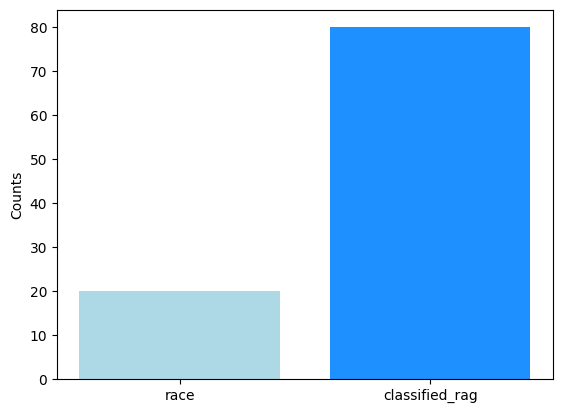

In [84]:
plt.figure()
plt.bar(['race', 'classified_rag'], [total_count['race'], total_count['classified_rag']], color=['#ADD8E6', '#1E90FF'])
# plt.xlabel('Best Description Number')
plt.ylabel('Counts')
# plt.title(f'Count of Best Description Numbers of RACE and Classified RAG')

# 保存图表到文件，也可以使用 plt.show() 直接显示
plt.savefig(f'{directory}total_bar_chart_two.png')

In [83]:
with open ('../data/angular_filtered/subsets/human_eval/people/processed/processed_no_human_ref_test_5.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# 统计data里item中Best_model='race'的数量
count = 0
for item in data:
    if item['Best_model'] == 'race':
        count+=1
print(count)

10


## kendalltau correlation

In [71]:
import numpy as np
import pandas as pd
from scipy.stats import kendalltau
import json
import glob
import re
# 定义一个函数来读取JSON文件并提取mapping_id
def extract_mapping_ids(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        # 提取每个item的mapping_id
        mapping_ids = [item['Best_description_number'] for item in data]
    return mapping_ids

# 定义一个函数来读取JSON文件并提取mapping_id
def extract_expressiveness(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        # 提取每个item的expressiveness1
        expressiveness = [item['Best_description_number'] for item in data]
    return expressiveness

# 获取所有志愿者的JSON文件路径列表
file_paths = glob.glob('../data/angular_filtered/subsets/human_eval/people/processed/*.json')

# 初始化一个字典来存储所有志愿者的数据
volunteer_data = {}



# 读取每个文件并提取数据
for i, file_path in enumerate(file_paths):
    # 使用正则表达式提取数字
    # 从路径中提取文件名
    filename = os.path.basename(file_path)
    match = re.search(r'(\d+)\.json$', filename)
    if match:
        vol_id = match.group(1)
        volunteer_name = f'Volunteer {vol_id}'
        volunteer_data[volunteer_name] = extract_expressiveness(file_path)
    else:
        print('match failed')

# 将数据转换为DataFrame
df = pd.DataFrame(volunteer_data)

# 获取志愿者数量
num_volunteers = df.shape[1]

# 初始化一个矩阵来存储Kendall's Tau值
tau_matrix = np.zeros((num_volunteers, num_volunteers))

# 计算成对的Kendall's Tau值
for i in range(num_volunteers):
    for j in range(i + 1, num_volunteers):
        tau, _ = kendalltau(df.iloc[:, i], df.iloc[:, j])
        tau_matrix[i, j] = tau
        tau_matrix[j, i] = tau

# 将Tau矩阵转换为DataFrame以便于读取
tau_df = pd.DataFrame(tau_matrix, columns=df.columns, index=df.columns)

print(tau_df)


             Volunteer 2  Volunteer 3  Volunteer 4  Volunteer 5  Volunteer 6  \
Volunteer 2     0.000000     0.361917     0.350649     0.431818     0.551846   
Volunteer 3     0.361917     0.000000     0.361917     0.361917     0.332267   
Volunteer 4     0.350649     0.361917     0.000000     0.675325     0.388578   
Volunteer 5     0.431818     0.361917     0.675325     0.000000     0.470212   
Volunteer 6     0.551846     0.332267     0.388578     0.470212     0.000000   
Volunteer 1     0.394506     0.226526     0.313665     0.475347     0.596776   

             Volunteer 1  
Volunteer 2     0.394506  
Volunteer 3     0.226526  
Volunteer 4     0.313665  
Volunteer 5     0.475347  
Volunteer 6     0.596776  
Volunteer 1     0.000000  


## Krippendorff’s alpha

In [14]:
from itertools import chain
from numpy import transpose, identity

def calculate_krippendorffs_alpha(data_for_alpha):
    # This is 12x4 matrix where each row represents all 4 reviewers' ratings for one store,
    # and each column represents each reviewer's ratings for all 12 store locations.
    ratings = data_for_alpha.tolist()

    # Helper function to calculate the agreement table:
    #   - each row i corresponds to a store
    #   - each column k represents a possible rating (1, 2, 3, or 4, in this case)
    #   - each table entry r_ik is the number of reviewers who gave store i rating k
    def get_agreement_table(ratings, categories):
        agreement = []

        for store in ratings:
            category_counts = list(map(lambda category: store.count(category), categories))
            if sum(category_counts) > 1: # Ignore any stores with less than two ratings
                agreement.append(category_counts)

        return agreement

    # Helper function that returns the weighted count of reviewers who gave store i a rating that at least partially matched category k
    # (For categorical data this is just the number of reviewers who picked category k)
    def get_weighted_rater_count(weights_k, agreement_i):
        weighted_count = 0
        for i in range(len(agreement_i)):
            weighted_count += weights_k[i] * agreement_i[i]
        return weighted_count

    # STEPS 1 & 2: CLEANING THE DATA AND BUILDING THE AGREEMENT TABLE

    # Get the set of all possible ratings our reviewer can give
    rating_categories = set(chain(*ratings)) 
    # Remove the placeholder value for missing ratings
    # rating_categories.remove(None) 
    agreement_table = get_agreement_table(ratings, rating_categories)

    # n is the number of stores (more generally, the number of items being rated)
    n = len(agreement_table) 
    # q is the number of possible rating categories
    q = len(rating_categories) 

    # get an array with r_i (the total number of reviewers who rated the ith store) for all stores
    raters_per_store = list(map(lambda r_ik: sum(r_ik), agreement_table)) 
    # rhat is the average number of reviewers who rated each store
    rhat = sum(raters_per_store) / n 

    # STEP 3: CHOOSING A WEIGHT FUNCTION

    # categorical weights are just the identity matrix (1 if the category matches and 0 otherwise)
    weights = identity(len(rating_categories)) 

    # STEP 4: CALCULATING OBSERVED PERCENT AGREEMENT (p_a)
    percent_agreement = 0
    for i in range(n): # Find the percent agreement for every store
        percent_agreement_i = 0
        for k in range(q): # Find the percent agreement for every category for the ith store
            rhat_ik = get_weighted_rater_count(weights[k], agreement_table[i])
            ri = sum(agreement_table[i]) # Number of people who rated this store
            percent_agreement_i_k = (agreement_table[i][k] * (rhat_ik - 1)) / (rhat * (ri - 1))
            percent_agreement_i += percent_agreement_i_k
        
        percent_agreement += percent_agreement_i

    pa_prime = percent_agreement / n # Find the average store-level percent agreement

    total_rating_count = n * rhat
    pa = (1 - 1/(total_rating_count)) * pa_prime + 1/total_rating_count

    # STEP 5: CALCULATING EXPECTED PERCENT AGREEMENT (p_e)
    category_averages = list(map(lambda category: sum(category) / n, transpose(agreement_table)))
    classification_probabilities = list(map(lambda category_average: category_average / rhat, category_averages))

    pe = 0
    for k in range(q): # For every possible pair of rating categories
        for l in range(q):
            # Add the probability of those two categories being chosen at random, weighted by how closely they match
            pe += classification_probabilities[k] * classification_probabilities[l] * weights[k][l] 

    # STEP 6: CALCULATE KRIPPENDORFF'S ALPHA
    alpha = (pa - pe) / (1 - pe)
    print(f"Krippendorff's alpha: {alpha}")

In [64]:
import pandas as pd
import numpy as np
import json
import glob
import krippendorff

# 定义一个函数来读取JSON文件并提取mapping_id
def extract_mapping_ids(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        # 提取每个item的mapping_id
        mapping_ids = [item['Best_description_number'] for item in data]
    return mapping_ids

# 获取所有志愿者的JSON文件路径列表
# file_paths = glob.glob('../data/angular_filtered/subsets/human_eval/people/*.json')
file_paths = ['../data/angular_filtered/subsets/human_eval/people/no_human_ref_test_4.json', '../data/angular_filtered/subsets/human_eval/people/no_human_ref_test_5.json']
# 初始化一个字典来存储所有志愿者的数据
volunteer_data = {}

# 读取每个文件并提取数据
for i, file_path in enumerate(file_paths):
    volunteer_name = f'Volunteer {i + 1}'
    volunteer_data[volunteer_name] = extract_mapping_ids(file_path)

# 将数据转换为DataFrame
df = pd.DataFrame(volunteer_data)

# 将DataFrame转换为Krippendorff's alpha所需的格式
data_for_alpha = df.to_numpy()

calculate_krippendorffs_alpha(data_for_alpha)

Krippendorff's alpha: 0.6785714285714285


## Wilcoxon signed-rank tests

In [88]:
import numpy as np
from scipy.stats import wilcoxon

# 定义一个函数来读取JSON文件并提取mapping_id
def extract_rag(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        # 提取每个item的mapping_id
        mapping_ids = [item['Informativeness_rag'] for item in data]
    return mapping_ids

def extract_race(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        # 提取每个item的mapping_id
        mapping_ids = [item['Informativeness_race'] for item in data]
    return mapping_ids

# 获取所有志愿者的JSON文件路径列表
# file_paths = glob.glob('../data/angular_filtered/subsets/human_eval/people/*.json')
file_paths = ['../data/angular_filtered/subsets/human_eval/people/processed/processed_no_human_ref_test_5.json']
# 初始化一个字典来存储所有志愿者的数据
volunteer_data = {}

# 读取每个文件并提取数据
for i, file_path in enumerate(file_paths):
    volunteer_name = f'Volunteer {i + 1}'
    volunteer_data[volunteer_name] = extract_rag(file_path)

# 将数据转换为DataFrame
df_rag = pd.DataFrame(volunteer_data)

volunteer_data = {}
for i, file_path in enumerate(file_paths):
    volunteer_name = f'Volunteer {i + 1}'
    volunteer_data[volunteer_name] = extract_race(file_path)

# 将数据转换为DataFrame
df_race = pd.DataFrame(volunteer_data)

# Sample data
previous_method = df_race.to_numpy()
your_method = df_rag.to_numpy()

# Conducting the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(your_method, previous_method)

print(f'Wilcoxon signed-rank test statistic: {statistic}')
print(f'P-value: {p_value}')

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Your method is significantly different from the previous method.")
else:
    print("Do not reject the null hypothesis: No significant difference between the methods.")


Wilcoxon signed-rank test statistic: [73.]
P-value: [4.21168324e-05]
Reject the null hypothesis: Your method is significantly different from the previous method.


## Calculate indicator

In [34]:
import pandas as pd

# 读取JSON文件
with open('../data/angular_filtered/subsets/human_eval/people/no_human_ref_test_1.json', 'r') as f:
    data = json.load(f)

# 转换为DataFrame
df = pd.DataFrame(data)

# 选择需要的列
df = df[['Expressiveness1', 'Expressiveness2', 'Informativeness1', 'Informativeness2']]

# 计算每列的平均值
averages = df.mean()

print("各指标的平均值:")
print(averages)

各指标的平均值:
Expressiveness1     3.36
Expressiveness2     3.50
Informativeness1    3.12
Informativeness2    3.16
dtype: float64


In [72]:
with open('../data/angular_filtered/subsets/human_eval/no_human_ref_test_mapping.json', 'r', encoding='UTF-8') as file:
    mapping = json.load(file)

average_df = pd.DataFrame(columns=['Expressiveness_race', 'Informativeness_race', 'Expressiveness_rag', 'Informativeness_rag'])

for num in [4, 5]:
    # 读取JSON文件
    with open(f'../data/angular_filtered/subsets/human_eval/people/no_human_ref_test_{num}.json', 'r') as f:
        data = json.load(f)
    # 创建空的DataFrame
    df = pd.DataFrame(columns=['Expressiveness_race', 'Informativeness_race', 'Expressiveness_rag', 'Informativeness_rag'])
    for index, item in enumerate(data):
        mapping_key = f"Object-{index+1}"
        item_mapping = mapping[mapping_key]
        if item_mapping["1"] == 'race':
            new_row = {'Expressiveness_race': item['Expressiveness1'], 'Expressiveness_rag': item['Expressiveness2'], 
                       'Informativeness_race': item['Informativeness1'], 'Informativeness_rag': item['Informativeness2']}
        else:
            new_row = {'Expressiveness_race': item['Expressiveness2'], 'Expressiveness_rag': item['Expressiveness1'],
                       'Informativeness_race': item['Informativeness2'], 'Informativeness_rag': item['Informativeness1']}
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    # 计算每列的平均值
    averages = df.mean()
    average_df = pd.concat([average_df, pd.DataFrame([averages])], ignore_index=True)


/var/folders/8h/wq7f013d54v9m2hktbvqpfx00000gn/T/ipykernel_59256/3997999270.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  average_df = pd.concat([average_df, pd.DataFrame([averages])], ignore_index=True)


In [73]:
mean_expressiveness_race = average_df['Expressiveness_race'].mean()

std_expressiveness_race = average_df['Expressiveness_race'].std()
print(f"Mean Expressiveness of race is {mean_expressiveness_race}, with a standard deviation of {std_expressiveness_race}")

Mean Expressiveness of race is 3.7800000000000002, with a standard deviation of 0.05656854249492354


In [74]:
mean_expressiveness_rag = average_df['Expressiveness_rag'].mean()

std_expressiveness_rag = average_df['Expressiveness_rag'].std()
print(f"Mean Expressiveness of rag is {mean_expressiveness_rag}, with a standard deviation of {std_expressiveness_rag}")

Mean Expressiveness of rag is 3.78, with a standard deviation of 0.028284271247461926


In [75]:
mean_informativeness_race = average_df['Informativeness_race'].mean()
std_informativeness_race = average_df['Informativeness_race'].std()
print(f"Mean Informativeness of race is {mean_informativeness_race}, with a standard deviation of {std_informativeness_race}")

Mean Informativeness of race is 2.8, with a standard deviation of 0.16970562748477125


In [76]:
mean_informativeness_rag = average_df['Informativeness_rag'].mean()
std_informativeness_rag = average_df['Informativeness_rag'].std()
print(f"Mean Informativeness of rag is {mean_informativeness_rag}, with a standard deviation of {std_informativeness_rag}")

Mean Informativeness of rag is 3.41, with a standard deviation of 0.1555634918610406
